In [11]:
import pickle
import pandas as pd

In [12]:
hf_pytorch = pickle.load(open("pytorch_t5_benchmark.pkl", "rb"))
hf_tensorflow = pickle.load(open("tensorflow_t5_benchmark.pkl", "rb"))
tf_transformers_tensorflow = pickle.load(open("tf_transformers_t5_benchmark.pkl", "rb"))
tf_transformers_tensorflow_serialized = pickle.load(open("tf_transformers_t5_benchmark_serializable.pkl", "rb"))

# Greedy

In [13]:
# Columns
greedy_keys = hf_pytorch['greedy'].keys()

# results
greedy_results = []
greedy_results.append(list(hf_pytorch['greedy'].values()))
greedy_results.append(list(hf_tensorflow['greedy'].values()))
greedy_results.append(list(tf_transformers_tensorflow['greedy'].values()))
greedy_results.append(list(tf_transformers_tensorflow_serialized['greedy'].values()))

df_greedy = pd.DataFrame(greedy_results)

# columns and index
df_greedy.columns = greedy_keys
df_greedy.index   = ['hf_pytorch', 'hf_tensorflow', 'tf_transformers_tensorflow', 'tf_transformers_tensorflow_serialized']

In [14]:
# Highlight
df_greedy.style.highlight_min(color = 'lightgreen', axis = 0)


# Find the count of index based on speed


In [15]:
df_greedy.idxmin(axis=0).value_counts()

tf_transformers_tensorflow_serialized    20
dtype: int64

# Greedy Visualize

Text(0, 0.5, 'Time in Seconds')

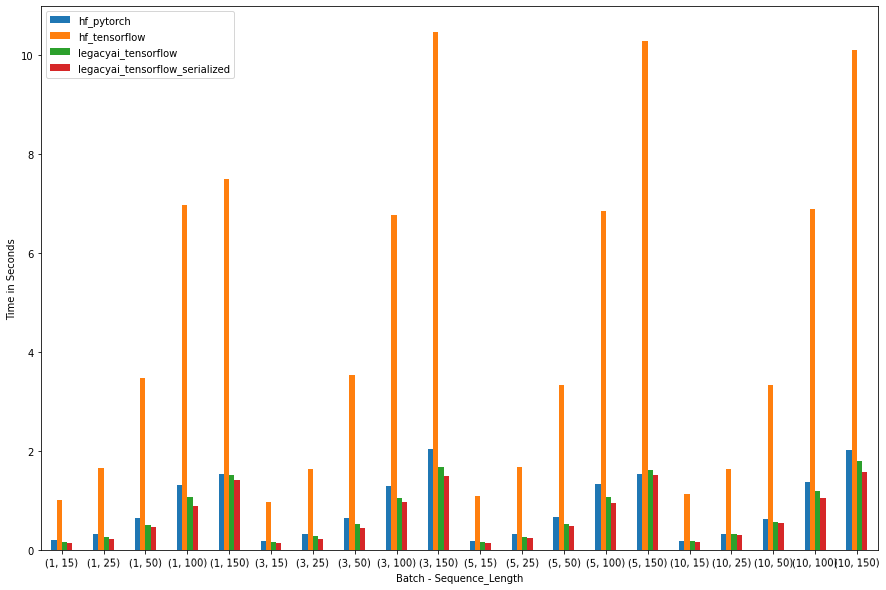

In [16]:
ax = df_greedy.transpose().plot.bar(rot=1, figsize=(15,10))
ax.set_xlabel("Batch - Sequence_Length")
ax.set_ylabel("Time in Seconds")

# Beam

In [18]:
beam_keys = list(hf_pytorch['beam'].keys())

# results
beam_results = []
beam_results.append(list(hf_pytorch['beam'].values()))
beam_results.append(list(hf_tensorflow['beam'].values()))
beam_results.append(list(tf_transformers_tensorflow['beam'].values()))

df_beam = pd.DataFrame(beam_results)

# columns and index
df_beam.columns = beam_keys
df_beam.index   = ['hf_pytorch', 'hf_tensorflow', 'tf_transformers_tensorflow']

In [19]:
# Highlight
df_beam.style.highlight_min(color='lightgreen', axis=0)

,"(1, 15, 1)","(1, 15, 2)","(1, 15, 5)","(1, 15, 7)","(1, 15, 10)","(1, 25, 1)","(1, 25, 2)","(1, 25, 5)","(1, 25, 7)","(1, 25, 10)","(1, 50, 1)","(1, 50, 2)","(1, 50, 5)","(1, 50, 7)","(1, 50, 10)","(1, 100, 1)","(1, 100, 2)","(1, 100, 5)","(1, 100, 7)","(1, 100, 10)","(1, 150, 1)","(1, 150, 2)","(1, 150, 5)","(1, 150, 7)","(1, 150, 10)","(3, 15, 1)","(3, 15, 2)","(3, 15, 5)","(3, 15, 7)","(3, 15, 10)","(3, 25, 1)","(3, 25, 2)","(3, 25, 5)","(3, 25, 7)","(3, 25, 10)","(3, 50, 1)","(3, 50, 2)","(3, 50, 5)","(3, 50, 7)","(3, 50, 10)","(3, 100, 1)","(3, 100, 2)","(3, 100, 5)","(3, 100, 7)","(3, 100, 10)","(3, 150, 1)","(3, 150, 2)","(3, 150, 5)","(3, 150, 7)","(3, 150, 10)","(5, 15, 1)","(5, 15, 2)","(5, 15, 5)","(5, 15, 7)","(5, 15, 10)","(5, 25, 1)","(5, 25, 2)","(5, 25, 5)","(5, 25, 7)","(5, 25, 10)","(5, 50, 1)","(5, 50, 2)","(5, 50, 5)","(5, 50, 7)","(5, 50, 10)","(5, 100, 1)","(5, 100, 2)","(5, 100, 5)","(5, 100, 7)","(5, 100, 10)","(5, 150, 1)","(5, 150, 2)","(5, 150, 5)","(5, 150, 7)","(5, 150, 10)","(10, 15, 1)","(10, 15, 2)","(10, 15, 5)","(10, 15, 7)","(10, 15, 10)","(10, 25, 1)","(10, 25, 2)","(10, 25, 5)","(10, 25, 7)","(10, 25, 10)","(10, 50, 1)","(10, 50, 2)","(10, 50, 5)","(10, 50, 7)","(10, 50, 10)","(10, 100, 1)","(10, 100, 2)","(10, 100, 5)","(10, 100, 7)","(10, 100, 10)","(10, 150, 1)","(10, 150, 2)","(10, 150, 5)","(10, 150, 7)","(10, 150, 10)"
hf_pytorch,0.192112,0.199666,0.211880,0.230248,0.232040,0.309437,0.332525,0.367953,0.384297,0.388736,0.643095,0.682295,0.723933,0.772760,0.778627,1.284810,1.398882,1.466831,1.537013,1.590195,1.925214,1.622280,1.680889,2.305249,1.898603,0.183853,0.208650,0.233334,0.260676,0.283644,0.304480,0.345530,0.397714,0.435151,0.468662,0.618974,0.727972,0.832205,0.898501,0.983960,1.288126,1.426229,1.633339,1.762276,1.940720,1.952833,1.707934,2.390033,2.706872,2.304093,0.182207,0.218090,0.258400,0.284482,0.325096,0.297653,0.374175,0.458846,0.508143,0.558505,0.628906,0.755731,0.872360,0.962726,1.106592,1.305816,1.537595,1.840439,2.003612,2.287934,1.866848,2.245495,2.123976,2.973895,2.635416,0.176388,0.255783,0.310502,0.359741,0.435918,0.309182,0.422257,0.555359,0.604017,0.737999,0.625326,0.881943,1.100119,1.279678,1.509330,1.230826,1.751893,2.290805,2.526009,3.076005,1.869984,2.099181,2.694781,3.104514,3.645823
hf_tensorflow,0.995713,1.016759,1.010669,1.150044,1.163556,1.719182,1.779722,1.817602,1.794719,1.923529,3.362957,3.592460,3.735320,3.908178,3.837393,7.539239,7.094487,7.494924,7.485219,7.745827,8.002446,10.427962,8.448499,8.403170,8.882479,1.035208,1.068758,1.197798,1.280389,1.386974,1.683167,1.785403,2.005081,2.207061,2.313403,3.396807,3.682025,4.032977,4.208594,4.600721,6.713309,7.644294,8.042976,8.732632,9.587156,7.822947,9.177452,9.805524,10.837087,14.138276,1.051395,1.204885,1.372379,1.466648,1.593411,1.631941,1.979199,2.223218,2.501292,2.758646,3.489780,3.879368,4.460714,5.301681,5.597791,6.903099,8.290532,9.016888,10.326181,11.063716,10.364393,12.053814,13.915357,11.370997,13.052251,0.994159,1.377871,1.694717,1.856764,2.189441,1.708487,2.190855,2.946162,3.070070,3.587729,3.281586,4.626918,5.710145,6.532319,7.229710,6.640663,9.266705,11.614798,12.696646,14.737116,10.188838,13.615260,12.861414,14.758583,17.226731
tf_transformers_tensorflow,0.195562,0.188383,0.200504,0.211410,0.240868,0.316666,0.344822,0.339628,0.352288,0.348381,0.617564,0.657732,0.657114,0.693096,0.720735,1.360734,1.312370,1.442382,1.336624,1.380391,1.830719,1.968257,2.062406,1.965763,2.021591,0.198450,0.191682,0.216082,0.223130,0.274657,0.325974,0.365467,0.326618,0.381716,0.451075,0.645729,0.644444,0.704885,0.782032,0.844509,1.228927,1.298593,1.415912,1.530015,1.631146,1.881105,1.977381,1.984467,2.303118,2.464102,0.179039,0.191449,0.243428,0.259151,0.336452,0.327014,0.324126,0.413875,0.442607,0.506523,0.617282,0.679493,0.799359,0.806628,0.970982,1.295679,1.289157,1.556355,1.727762,1.918746,2.016609,1.979346,2.325756,2.500569,2.878971,0.223068,0.249074,0.297119,0.377537,0.505338,0.354639,0.367066,0.4810

# Find the count of index based on speed


In [20]:
df_beam.idxmin(axis=0).value_counts()

tf_transformers_tensorflow    71
hf_pytorch             29
dtype: int64

# Beam Visualize

Text(0, 0.5, 'Time in Seconds')

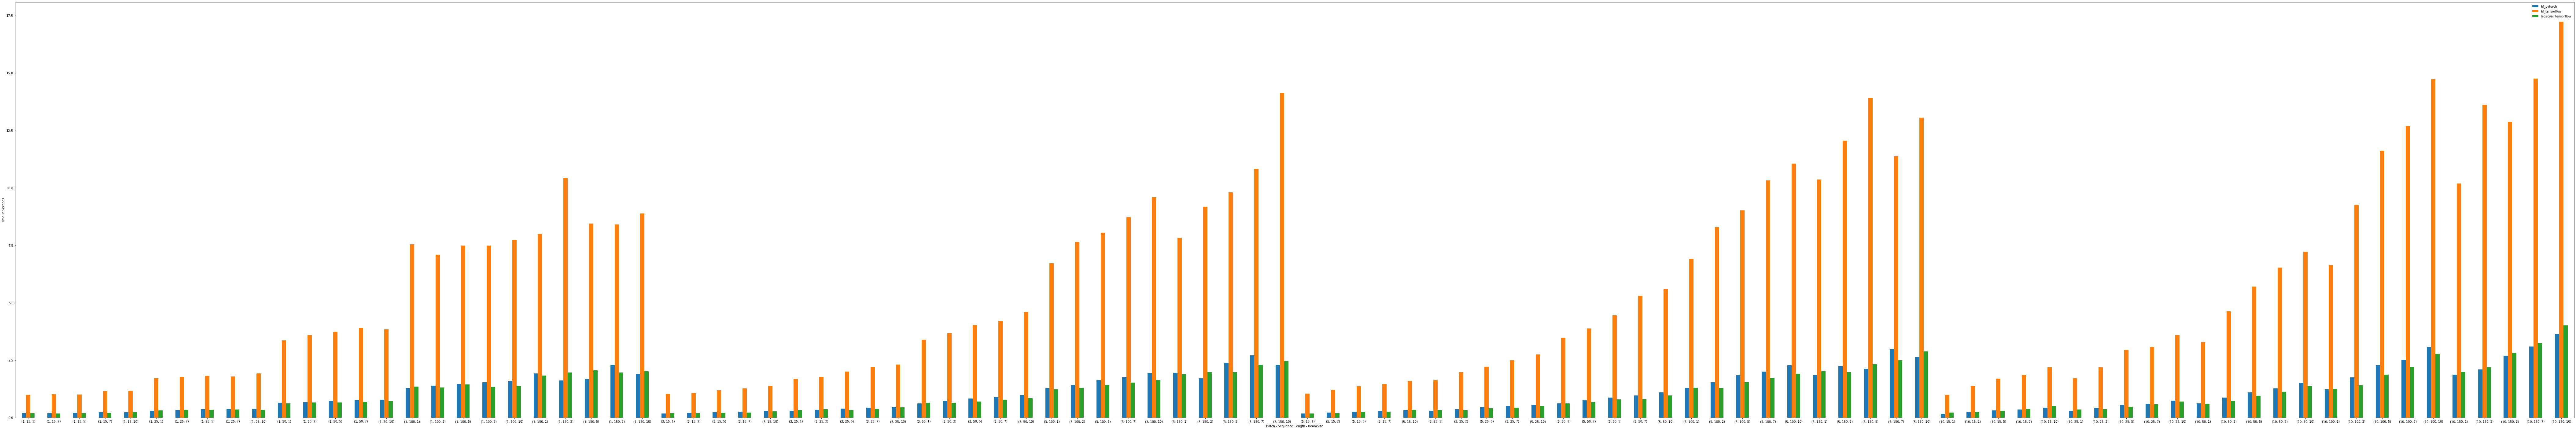

In [21]:
ax = df_beam.transpose().plot.bar(rot=1, figsize=(150,25))
ax.set_xlabel("Batch - Sequence_Length - BeamSize")
ax.set_ylabel("Time in Seconds")

# top K top P

In [22]:
top_k_top_p_keys = list(hf_pytorch['top_k_top_p'].keys())

# results
top_k_top_p_results = []
top_k_top_p_results.append(list(hf_pytorch['top_k_top_p'].values()))
top_k_top_p_results.append(list(hf_tensorflow['top_k_top_p'].values()))
top_k_top_p_results.append(list(tf_transformers_tensorflow['top_k_top_p'].values()))

df_top_k_top_p = pd.DataFrame(top_k_top_p_results)

# columns and index
df_top_k_top_p.columns = top_k_top_p_keys
df_top_k_top_p.index   = ['hf_pytorch', 'hf_tensorflow', 'tf_transformers_tensorflow']

In [23]:
# Highlight
df_top_k_top_p.style.highlight_min(color='lightgreen', axis=0)

,"(1, 15, 1)","(1, 15, 2)","(1, 15, 5)","(1, 15, 7)","(1, 15, 10)","(1, 25, 1)","(1, 25, 2)","(1, 25, 5)","(1, 25, 7)","(1, 25, 10)","(1, 50, 1)","(1, 50, 2)","(1, 50, 5)","(1, 50, 7)","(1, 50, 10)","(1, 100, 1)","(1, 100, 2)","(1, 100, 5)","(1, 100, 7)","(1, 100, 10)","(1, 150, 1)","(1, 150, 2)","(1, 150, 5)","(1, 150, 7)","(1, 150, 10)","(3, 15, 1)","(3, 15, 2)","(3, 15, 5)","(3, 15, 7)","(3, 15, 10)","(3, 25, 1)","(3, 25, 2)","(3, 25, 5)","(3, 25, 7)","(3, 25, 10)","(3, 50, 1)","(3, 50, 2)","(3, 50, 5)","(3, 50, 7)","(3, 50, 10)","(3, 100, 1)","(3, 100, 2)","(3, 100, 5)","(3, 100, 7)","(3, 100, 10)","(3, 150, 1)","(3, 150, 2)","(3, 150, 5)","(3, 150, 7)","(3, 150, 10)","(5, 15, 1)","(5, 15, 2)","(5, 15, 5)","(5, 15, 7)","(5, 15, 10)","(5, 25, 1)","(5, 25, 2)","(5, 25, 5)","(5, 25, 7)","(5, 25, 10)","(5, 50, 1)","(5, 50, 2)","(5, 50, 5)","(5, 50, 7)","(5, 50, 10)","(5, 100, 1)","(5, 100, 2)","(5, 100, 5)","(5, 100, 7)","(5, 100, 10)","(5, 150, 1)","(5, 150, 2)","(5, 150, 5)","(5, 150, 7)","(5, 150, 10)","(10, 15, 1)","(10, 15, 2)","(10, 15, 5)","(10, 15, 7)","(10, 15, 10)","(10, 25, 1)","(10, 25, 2)","(10, 25, 5)","(10, 25, 7)","(10, 25, 10)","(10, 50, 1)","(10, 50, 2)","(10, 50, 5)","(10, 50, 7)","(10, 50, 10)","(10, 100, 1)","(10, 100, 2)","(10, 100, 5)","(10, 100, 7)","(10, 100, 10)","(10, 150, 1)","(10, 150, 2)","(10, 150, 5)","(10, 150, 7)","(10, 150, 10)"
hf_pytorch,0.229738,0.221121,0.222830,0.223070,0.227556,0.359131,0.376154,0.371795,0.368311,0.359472,0.722503,0.766618,0.774869,0.770415,0.764341,1.496050,1.489680,1.554406,1.517820,1.547502,1.749270,1.781665,2.330290,2.343911,1.800787,0.211406,0.219666,0.223044,0.239473,0.249147,0.348187,0.360663,0.381487,0.405696,0.427528,0.741878,0.773495,0.777565,0.834502,0.876930,1.511365,1.468629,1.587267,1.689734,1.756106,1.730709,2.294412,1.809767,1.928239,2.053847,0.213532,0.224589,0.240605,0.256806,0.263476,0.373765,0.373857,0.405755,0.432894,0.427859,0.719609,0.719127,0.819426,0.860655,0.887830,1.497761,1.488241,1.696506,1.697712,1.831165,2.338952,1.805101,2.114439,2.071699,2.699215,0.218154,0.216622,0.260470,0.254172,0.282952,0.353221,0.380111,0.430333,0.456144,0.492625,0.744539,0.765610,0.878687,0.904447,0.970383,1.511433,1.608658,1.789110,1.813781,1.910275,1.654959,1.736931,2.035750,2.714872,2.784797
hf_tensorflow,1.046624,1.070725,1.162967,1.181567,1.195096,1.814022,1.814336,1.908555,2.006258,2.079140,3.624160,3.640546,3.896484,3.938284,4.329129,7.417896,7.233316,7.644792,7.990506,8.416021,8.126881,8.441911,9.160339,9.151195,9.812745,1.059015,1.210173,1.307724,1.416031,1.591483,1.822005,1.861442,2.162802,2.505392,2.650543,3.631727,3.743052,4.454783,4.725486,5.277889,7.345624,7.741953,8.817995,9.617053,10.904583,8.292833,8.981987,13.525727,11.213038,12.422508,1.080599,1.192959,1.475994,1.635444,1.841790,1.830434,2.199855,2.499041,2.853446,3.028118,3.948531,4.103544,4.953193,5.564846,6.287362,7.452794,8.432966,10.148339,11.156733,13.052291,8.922270,9.573844,11.983783,13.016677,15.259427,1.174521,1.460881,1.901624,2.202065,2.703080,2.010916,2.373121,3.131036,3.667714,4.537007,4.088745,4.756330,6.288945,7.516986,9.379179,8.356822,9.735034,12.725294,16.279935,18.863831,9.457587,11.027165,15.714508,23.481608,22.595686
tf_transformers_tensorflow,0.153796,0.174890,0.163238,0.175220,0.173596,0.266187,0.266976,0.277250,0.290629,0.310122,0.477592,0.486849,0.529770,0.515548,0.566016,0.974358,1.131118,1.048428,1.027972,1.050310,1.436774,1.585935,1.610844,1.577257,1.637767,0.145723,0.189426,0.194385,0.224242,0.247039,0.268640,0.259149,0.297332,0.362994,0.394586,0.518428,0.526188,0.556592,0.634368,0.782936,1.026699,1.104007,1.177049,1.317912,1.440399,1.558351,1.592458,1.744506,1.966992,2.190292,0.167241,0.163802,0.226736,0.243815,0.298713,0.254740,0.311526,0.369376,0.385630,0.466222,0.476791,0.519112,0.687054,0.775826,0.902289,1.047967,1.097928,1.357747,1.495982,1.778600,1.608070,1.642912,1.980243,2.298527,2.636533,0.169876,0.216022,0.298776,0.350514,0.450733,0.300912,0.331094,0.47185

# Find the count of index based on speed


In [24]:
df_top_k_top_p.idxmin(axis=0).value_counts()

tf_transformers_tensorflow    79
hf_pytorch             21
dtype: int64

# top K top P Visualize

Text(0, 0.5, 'Time in Seconds')

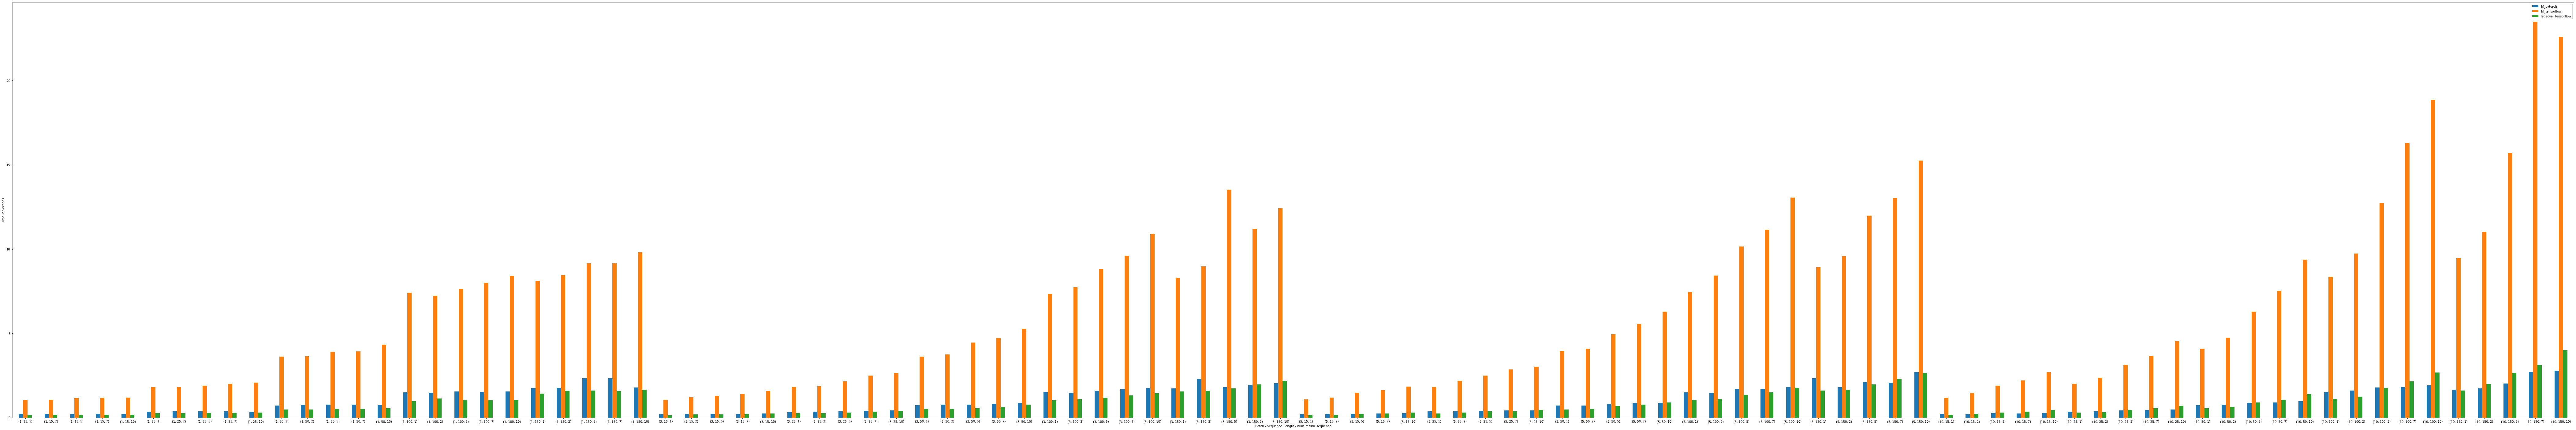

In [25]:
ax = df_top_k_top_p.transpose().plot.bar(rot=1, figsize=(150,25))
ax.set_xlabel("Batch - Sequence_Length - num_return_sequence")
ax.set_ylabel("Time in Seconds")